In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import csv

# Leitura de dados

In [2]:
todos_dados = pd.read_csv("data.csv")
todos_dados

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Unnamed: 17
0,0,0.010200,833.00,204600,434.00,0.021900,2,165.0000,-8795.00,1,431.0000,150062.00,4.0,286.00,1,Mask Off,Future,NaN
1,1,199.000000,743.00,326933,359.00,0.006110,1,137.0000,-10401.00,1,0.0794,160083.00,4.0,588.00,1,Redbone,Childish Gambino,NaN
2,2,0.034400,838.00,185707,412.00,0.000234,2,159.0000,-7148.00,1,289.0000,75044.00,4.0,173.00,1,Xanny Family,Future,NaN
3,3,604.000000,494.00,199413,338.00,0.510000,5,0.0922,-15236.00,1,0.0261,86468.00,4.0,0.23,1,Master Of None,Beach House,NaN
4,4,0.180000,678.00,392893,561.00,512.000000,5,439.0000,-11648.00,0,0.0694,174004.00,4.0,904.00,1,Parallel Lines,Junior Boys,NaN
5,5,0.004790,804.00,251333,0.56,0.000000,8,164.0000,-6682.00,1,185.0000,85023.00,4.0,264.00,1,Sneakin’,Drake,NaN
6,6,0.014500,739.00,241400,472.00,0.000007,1,207.0000,-11204.00,1,156.0000,80.03,4.0,308.00,1,Childs Play,Drake,NaN
7,7,0.020200,266.00,349667,348.00,664.000000,10,0.1600,-11609.00,0,0.0371,144154.00,4.0,393.00,1,Gyöngyhajú lány,Omega,NaN
8,8,0.048100,603.00,202853,944.00,0.000000,11,342.0000,-3626.00,0,347.0000,130035.00,4.0,398.00,1,I've Seen Footage,Death Grips,NaN
9,9,0.002080,836.00,226840,603.00,0.000000,7,571.0000,-7792.00,1,237.0000,99994.00,4.0,386.00,1,Digital Animal,Honey Claws,NaN


# Seleção de atributos

In [3]:
dados_analise = pd.read_csv("data.csv", usecols=['acousticness','danceability','instrumentalness','energy','speechiness'])
dados_analise

,acousticness,danceability,energy,instrumentalness,speechiness
0,0.010200,833.00,434.00,0.021900,431.0000
1,199.000000,743.00,359.00,0.006110,0.0794
2,0.034400,838.00,412.00,0.000234,289.0000
3,604.000000,494.00,338.00,0.510000,0.0261
4,0.180000,678.00,561.00,512.000000,0.0694
5,0.004790,804.00,0.56,0.000000,185.0000
6,0.014500,739.00,472.00,0.000007,156.0000
7,0.020200,266.00,348.00,664.000000,0.0371
8,0.048100,603.00,944.00,0.000000,347.0000
9,0.002080,836.00,603.00,0.000000,237.0000


# Cálculo do melhor número de grupos

In [5]:
wcss = []
clusters = []
for n in range(2, 20):
    kmeans = KMeans(n_clusters=n, max_iter=10000)
    kmeans.fit(dados_analise)
    wcss.append(kmeans.inertia_)
    clusters.append(n)

wcss

[415595555.7227602,
 325291181.1536934,
 270439493.4276898,
 216038553.36455232,
 184346906.47748223,
 164540328.56246012,
 150095439.8202314,
 138824591.56821683,
 129469859.06138165,
 121439146.8230733,
 115136610.86210158,
 111002216.48418202,
 104159350.0573011,
 99412756.5317526,
 96155980.23931138,
 93639253.22889167,
 88979484.4453299,
 86852278.72503906]

<function matplotlib.pyplot.show(*args, **kw)>

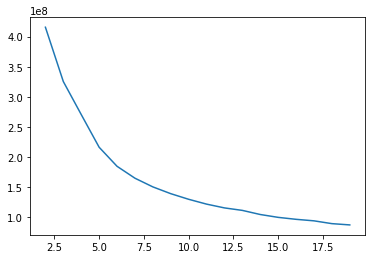

In [6]:
mp.plot(clusters,wcss)
mp.show

# Execução K-means

In [7]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=10000)

In [8]:
kmeans.fit(dados_analise)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([3, 0, 3, ..., 3, 2, 3], dtype=int32)

In [10]:
todos_dados['Grupos'] = kmeans.labels_
dados_analise['Grupos'] = kmeans.labels_

In [11]:
todos_dados

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Unnamed: 17,Grupos
0,0,0.010200,833.00,204600,434.00,0.021900,2,165.0000,-8795.00,1,431.0000,150062.00,4.0,286.00,1,Mask Off,Future,NaN,3
1,1,199.000000,743.00,326933,359.00,0.006110,1,137.0000,-10401.00,1,0.0794,160083.00,4.0,588.00,1,Redbone,Childish Gambino,NaN,0
2,2,0.034400,838.00,185707,412.00,0.000234,2,159.0000,-7148.00,1,289.0000,75044.00,4.0,173.00,1,Xanny Family,Future,NaN,3
3,3,604.000000,494.00,199413,338.00,0.510000,5,0.0922,-15236.00,1,0.0261,86468.00,4.0,0.23,1,Master Of None,Beach House,NaN,5
4,4,0.180000,678.00,392893,561.00,512.000000,5,439.0000,-11648.00,0,0.0694,174004.00,4.0,904.00,1,Parallel Lines,Junior Boys,NaN,2
5,5,0.004790,804.00,251333,0.56,0.000000,8,164.0000,-6682.00,1,185.0000,85023.00,4.0,264.00,1,Sneakin’,Drake,NaN,0
6,6,0.014500,739.00,241400,472.00,0.000007,1,207.0000,-11204.00,1,156.0000,80.03,4.0,308.00,1,Childs Play,Drake,NaN,3
7,7,0.020200,266.00,349667,348.00,664.000000,10,0.1600,-11609.00,0,0.0371,144154.00,4.0,393.00,1,Gyöngyhajú lány,Omega,NaN,2
8,8,0.048100,603.00,202853,944.00,0.000000,11,342.0000,-3626.00,0,347.0000,130035.00,4.0,398.00,1,I've Seen Footage,Death Grips,NaN,3
9,9,0.002080,836.00,226840,603.00,0.000000,7,571.0000,-7792.00,1,237.0000,99994.00,4.0,386.00,1,Digital Animal,Honey Claws,NaN,3


# Data frame para cada grupo

In [14]:
clusters = []
clusters_infos = []
for i in range(0,num_clusters):
    for i in range(0,num_clusters):
        clusters.append(dados_analise.query('Grupos == '+ str(i)))
        clusters_infos.append(todos_dados.query('Grupos == '+ str(i)))
    

# Cálculo da média dos atributos de cada grupo

In [15]:
media_cluster = [[] for _ in range(num_clusters)]
for i in range(0,num_clusters):
    media_cluster[i].append(clusters[i].acousticness.mean())
    media_cluster[i].append(clusters[i].danceability.mean())
    media_cluster[i].append(clusters[i].energy.mean())
    media_cluster[i].append(clusters[i].instrumentalness.mean())
    media_cluster[i].append(clusters[i].speechiness.mean())
    
media_cluster

[[84.74941216842105,
  546.8963684210527,
  33.85806210526316,
  60.07493110352631,
  52.116218421052615],
 [877.4461538461538,
  367.84076923076924,
  135.1553523076923,
  738.6615384615385,
  3.9297184615384615],
 [35.23789823955224,
  546.5051243781095,
  725.3294288557213,
  744.6865671641791,
  29.71077661691542],
 [58.53724710900981,
  656.628902765388,
  733.8189116859946,
  12.893835458804638,
  63.56266931311328],
 [77.29503510718448,
  87.80742718446602,
  736.6893203883495,
  34.36560418485437,
  64.7306572815534],
 [630.0811965811965,
  554.5985042735042,
  427.94025299145295,
  19.231568334102565,
  39.46743931623932]]

# Gráfico radar para cada grupo

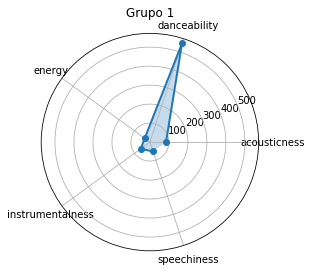

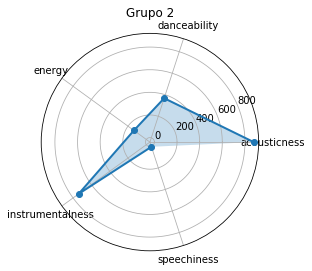

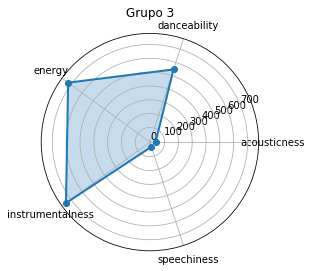

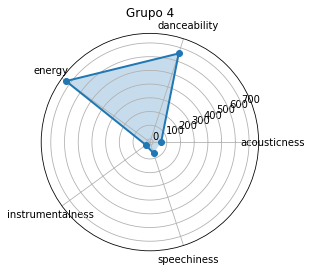

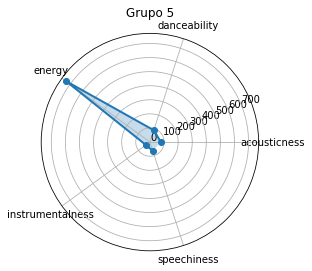

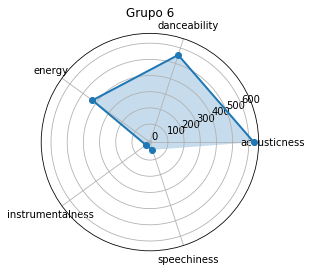

In [16]:
for n in range(0,num_clusters):
    labels = ['acousticness','danceability','energy','instrumentalness','speechiness']
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=media_cluster[n]
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Grupo ' + str(n+1))
    ax.grid(True)

# Exportando para CSV


In [18]:
for n in range(0,num_clusters):
    with open('grupo' + str(n+1)+'.csv', 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
        spamwriter.writerow(['song_title','artist'])
        for i in range(0,len(clusters_infos[n])):
            spamwriter.writerow([str(clusters_infos[n].iloc[i]['song_title']),str(clusters_infos[n].iloc[i]['artist'])])

